In [18]:
# set titles for all plots 
    # Ask Jennetta about pandas titles 
    # Ask Jennetta about seaborn heat mapt values
# rename columns so first letter is capitol 

'''
Future 
'''
# more work with balance 
# print()
# outliers fall in numerical data types

In [ ]:
'''
Getting data ready for logisitc regression analysis:
1. Values are binomial
2. Applying logit function to CONTINUOUS INDEPENDENT variables

'''

In [1]:
'''
Exploratory Data Analysis with:

                pandas 
                matplotlib (scatter and bar plot)
                seaborn (heatmaps) 

'''

# import necessary libraries
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# marketing data to analyze
path = 'data/marketing_analysis.csv'
df = pd.read_csv(path,skiprows=2)

In [2]:
df.columns

Index(['customerid', 'age', 'salary', 'balance', 'marital', 'jobedu',
       'targeted', 'default', 'housing', 'loan', 'contact', 'day', 'month',
       'duration', 'campaign', 'pdays', 'previous', 'poutcome', 'response'],
      dtype='object')

In [71]:
# rows and columns
df.head()

,customerid,age,salary,balance,marital,jobedu,targeted,default,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,response
0,1,58.0,100000,2143,married,"management,tertiary",yes,no,yes,no,unknown,5,"may, 2017",261 sec,1,-1,0,unknown,no
1,2,44.0,60000,29,single,"technician,secondary",yes,no,yes,no,unknown,5,"may, 2017",151 sec,1,-1,0,unknown,no
2,3,33.0,120000,2,married,"entrepreneur,secondary",yes,no,yes,yes,unknown,5,"may, 2017",76 sec,1,-1,0,unknown,no
3,4,47.0,20000,1506,married,"blue-collar,unknown",no,no,yes,no,unknown,5,"may, 2017",92 sec,1,-1,0,unknown,no
4,5,33.0,0,1,single,"unknown,unknown",no,no,no,no,unknown,5,"may, 2017",198 sec,1,-1,0,unknown,no


In [8]:
df.balance.describe()
df.balance.nunique()

7168

In [11]:
df.salary.describe()
df.salary.nunique()
# 4464 9000 0013 2532

11

In [5]:
continuous_vars = ['age','balance',]

count    45191.000000
mean        40.935651
std         10.619198
min         18.000000
25%         33.000000
50%         39.000000
75%         48.000000
max         95.000000
Name: age, dtype: float64

In [3]:
# jobedu has two specific data values in the column
df.jobedu
# get job data from jobedu column in its own column 
df['job'] = df.jobedu.apply(lambda x: x.split(",")[0])
# get education data from jobedu column in its own column 
df['education'] = df.jobedu.apply(lambda x: x.split(",")[1])
# since we have the data drop the column
df = df.drop('jobedu',axis = 1)

In [5]:
len(df.job.unique())

12

In [6]:
df.job.unique()

array(['management', 'technician', 'entrepreneur', 'blue-collar',
       'unknown', 'retired', 'admin.', 'services', 'self-employed',
       'unemployed', 'housemaid', 'student'], dtype=object)

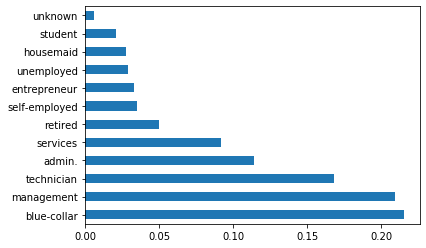

In [8]:
df.job.value_counts(normalize=True).plot.barh()

In [73]:
# customer id is a repeat of index
df.drop('customerid',axis = 1, inplace=True)

In [74]:
'''
Exploratory Data Analysis:

    NaN:
        1. Check which columns have NaN values
        
    Data Type: 
        2. Check data type of column
        
    Fill:
        3. Dropping NaN values from dataset and replace depending on data type
        4. Numerical data type replace with mean
        5. Object data type replaced with mode
        
    Verify:    
        6. Verify data is filled
        
'''
print("Procedures")

Procedures


In [75]:
'''
Age Data 
'''
# remove null values 
df.isnull().sum()
# Removing Null Values
# age nulls with mean because numerics type of data
type(df.age[0])
mean = df.age.mean()
# fill the NaN data with average from column
df.age = df.age.fillna(mean)
# verifying data is filled
df.age.isnull().sum()

0

In [76]:
'''
Month Data
'''
# converting string to datetime values using pandas
#    mode of month to fill NaN values because it is a pandas object data type
type(df.month[0])
df.month = pd.to_datetime(df.month)
# find mode of column
month_mode = df.month.mode()[0]
# fill NaN values with mode of column 
df.month = df.month.fillna(month_mode)
# verify data is filled
df.month.isnull().sum()

0

In [77]:
'''
Response Data
'''
# visualizing object data type to see the occurence of each object to know what to fill
type(df.response[0])
df.response.value_counts(normalize=True)
# object data types are fill with mode of data except when target value, drop them 
response_mode = df.response.mode()[0]
# fill data with mode 
df = df.dropna(axis='index')
# verify data is filled
df.response.isnull().sum()

0

In [78]:
'''
Verify data is filled
'''
df.isnull().sum()

age          0
salary       0
balance      0
marital      0
targeted     0
default      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
response     0
job          0
education    0
dtype: int64

In [79]:
'''
Exploratory Data Analysis:

    Visualize:
        1. Plot the data for Data Analysis after removing NaN values
            - Depending on data type of column the data will be analyzed a certain way
    
                a. OBJECT data type will be viewed by value counts (how many type each category appears in column)
                b. NUMERICAL data type will be viewed based on statistics of data (using .describe() in column from pandas)
'''
print("Procedures")

Procedures


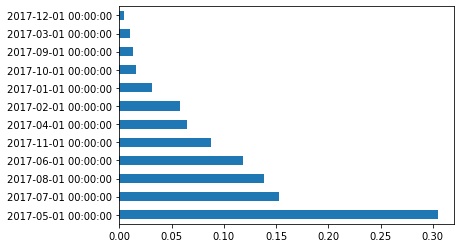

In [80]:
'''
Month Data
'''
# month column is categorical so we use value counts to analyze this data 
df.month.value_counts(normalize=True)
# plot the value counts of the analyzed data on a bar graph
df.month.value_counts(normalize=True).plot.barh()

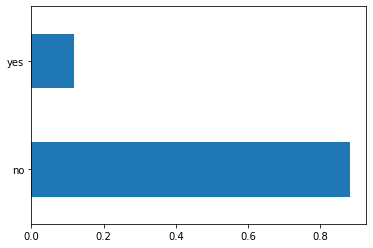

In [81]:
'''
Response Data
'''
# response column is categorical so we use value counts to analyze this data
df.response.value_counts(normalize=True)
# plot the value counts of this data into a bar graph since it is categorical
df.response.value_counts(normalize=True).plot.barh()

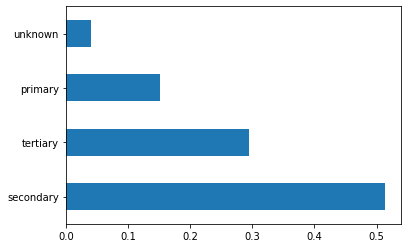

In [82]:
'''
Education Data
'''
# education is a categorical variable so we use the value counts of this variable to analyze it
df.education.value_counts(normalize=True)
# plot the results of the value counts 
# educational data in this column is also a time series data (in order of primary, tertiary, and secondary)
df.education.value_counts(normalize=True).plot.barh()

In [83]:
'''
Looking for outliers:

Comparing Numeric data types:
    
    Two Numeric data types:
        - Scatter Plot
        - Pair Plot
        - Correlation Matrix
    
    Three numeric data types:
        - Pair Plot
        - Correlation Matrix
    
Comparing Numeric-Categorical data types:
    
    One Numerical, One Categorical
        - Mean
        - Median
        - Box Plots
    
Using matplotlib for scatter function on plt object
Using a scatter plot for COMPARING NUMERICAL data to analyze 
    Sometimes Univariate analysis is not significant (will not show outliers)
    This is where Multivariate analysis comes in (more than one variable)
'''
print("Procedures for next lines")

Procedures for next lines


In [84]:
'''
Checking data types for analysis strategies
'''

type(df.salary[0])

numpy.int64

In [85]:
'''
Checking data types for analysis strategies
'''

type(df.balance[0])

numpy.int64

In [86]:
'''
Checking data types for analysis strategies
'''

type(df.age[0])

numpy.float64

In [10]:
len(df.salary.unique())

11

In [12]:
df.salary.unique()

array([100000,  60000, 120000,  20000,      0,  55000,  50000,  70000,
         8000,  16000,   4000])

In [14]:
df.balance.unique()

array([ 2143,    29,     2, ...,  8205, 14204, 16353])

In [16]:
len(df.balance.unique())

7168

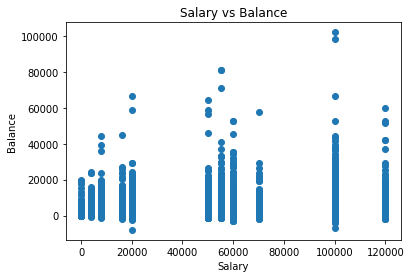

In [87]:
'''
Comparing two Numeric data types:
    - Scatter Plot
    - Pair Plot
    - Correlation Matrix
'''


'''
Scatter Plots (for numeric) using matplotlib
'''

plt.scatter(df.salary,df.balance)
plt.title("Salary vs Balance")
plt.xlabel("Salary")
plt.ylabel("Balance")
plt.show()


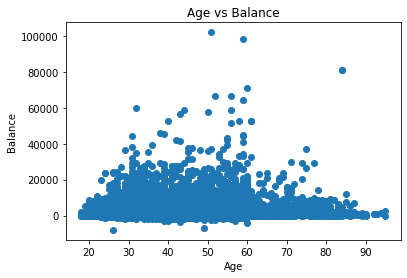

In [88]:
'''
Comparing two Numeric data types:
    - Scatter Plot
    - Pair Plot
    - Correlation Matrix
'''

'''
Scatter Plots (for numeric) using matplotlib
'''

plt.scatter(df.age,df.balance)
plt.title("Age vs Balance")
plt.xlabel("Age")
plt.ylabel("Balance")
plt.show()

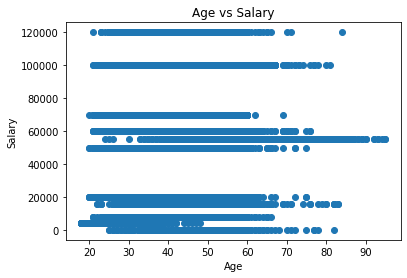

In [89]:
'''
Comparing two Numeric data types:
    - Scatter Plot
    - Pair Plot
    - Correlation Matrix
'''

'''
Scatter Plots (for numeric) using matplotlib
'''

plt.scatter(df.age,df.salary)
plt.title("Age vs Salary")
plt.xlabel("Age")
plt.ylabel("Salary")
plt.show()

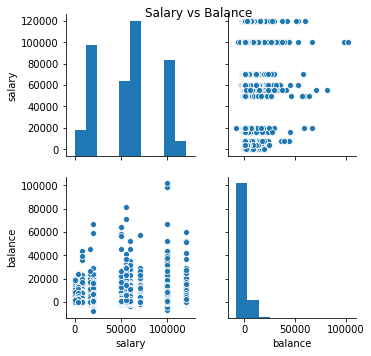

In [90]:
'''
Comparing two Numeric data types:
    - Scatter Plot
    - Pair Plot
    - Correlation Matrix
'''

'''
Pair plots (for numeric) using seaborn
    - .pairplot() method
'''

plot = sns.pairplot(data = df, vars=['salary','balance'])
plot.fig.suptitle("Salary vs Balance")
plt.show()

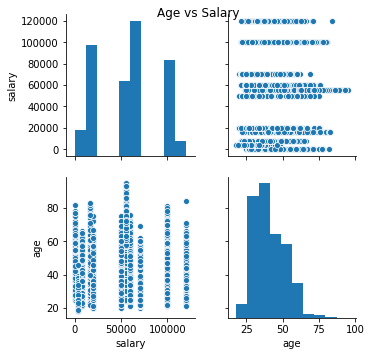

In [91]:
'''
Comparing two Numeric data types:
    - Scatter Plot
    - Pair Plot
    - Correlation Matrix
'''

'''
Pair plots (for numeric) using seaborn
    - .pairplot() method
'''

plot = sns.pairplot(data = df, vars=['salary','age'])
plot.fig.suptitle("Age vs Salary")
plt.show()

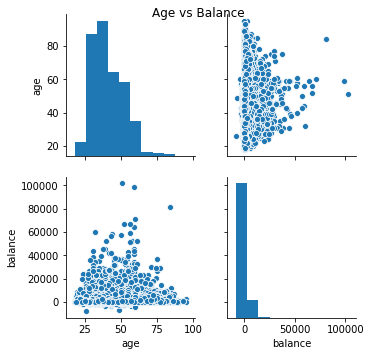

In [92]:
'''
Comparing two Numeric data types:
    - Scatter Plot
    - Pair Plot
    - Correlation Matrix
'''


'''
Pair plots (for numeric) using seaborn
    - .pairplot() method
'''

plot = sns.pairplot(data = df, vars=['age','balance'])
plot.fig.suptitle("Age vs Balance")
plt.show()

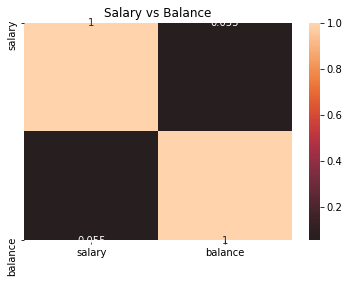

In [93]:
'''
Comparing two Numeric data types:
    - Scatter Plot
    - Pair Plot
    - Correlation Matrix
'''

'''
Correlation matrix (for numeric) using: 
    - pandas .corr() method
    - seaborn .heatmap() method  
'''
ax = plt.axes()
data = df[['salary','balance']].corr()
plot = sns.heatmap(data,ax = ax,center = 0,annot=True)
ax.set_title("Salary vs Balance")
plt.show()

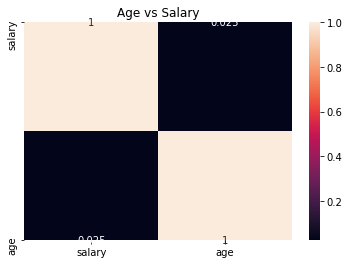

In [94]:
'''
Comparing two Numeric data types:
    - Scatter Plot
    - Pair Plot
    - Correlation Matrix
'''

'''
Correlation matrix (for numeric) using: 
    - pandas .corr() method
    - seaborn .heatmap() method  
'''
ax = plt.axes()
data = df[['salary','age']].corr()
sns.heatmap(data,ax = ax,annot=True)
ax.set_title("Age vs Salary")
plt.show()

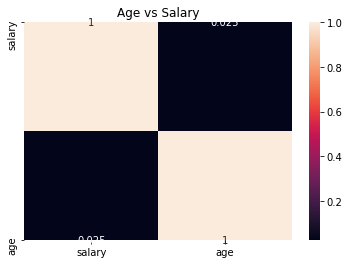

In [95]:
'''
Comparing two Numeric data types:
    - Scatter Plot
    - Pair Plot
    - Correlation Matrix
'''

'''
Correlation matrix (for numeric) using: 
    - pandas .corr() method
    - seaborn .heatmap() method  
'''
ax = plt.axes()
data = df[['salary','age']].corr()
sns.heatmap(data,ax = ax,annot=True)
ax.set_title("Age vs Salary")
plt.show()

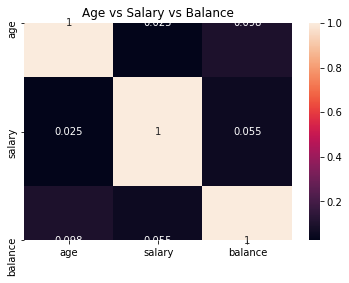

In [96]:
'''
Three numeric features:
    
    Using correlation matrix (for numeric data type)

        - pandas.corr() method
        - seaborn .heatmap() method
        
    Using mean
        - pandas .groupby()[].mean()
    Using median
        - pandas .groupby()[].median()
'''
ax = plt.axes()
data = df[['age','salary','balance']].corr()
sns.heatmap(data,ax = ax,annot=True)
ax.set_title("Age vs Salary vs Balance")
plt.show()

response
no     56770.917933
yes    58771.704180
Name: salary, dtype: float64

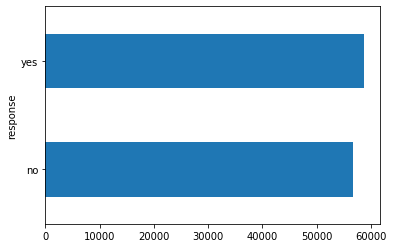

In [97]:
'''
Comparing Numeric-Categorical data types:
    
    One Numerical, One Categorical
        - Mean
        - Median
        - Box Plots
'''

'''
Using mean to compare Categorical and Numerical data type
'''
df.groupby('response')['salary'].mean().plot.barh()
df.groupby('response')['salary'].mean()

response
no     60000
yes    60000
Name: salary, dtype: int64

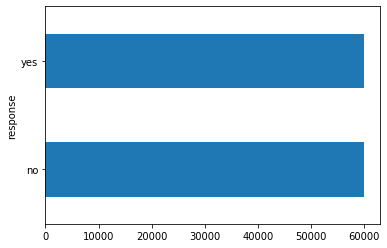

In [98]:
'''
Comparing Numeric-Categorical data types:
    
    One Numerical, One Categorical
        - Mean
        - Median
        - Box Plots
'''

'''
Using median to compare Categorical and Numerical data type
'''
df.groupby('response')['salary'].median().plot.barh()
df.groupby('response')['salary'].median()

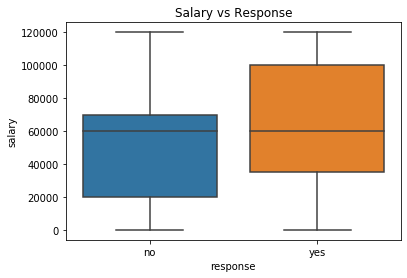

In [99]:
'''
Comparing Numeric-Categorical data types:
    
    One Numerical, One Categorical
        - Mean
        - Median
        - Box Plots
'''

'''
Using boxplots to compare Categorical and Numerical data type
'''
ax = plt.axes()
sns.boxplot(df.response,df.salary, ax = ax)
ax.set_title("Salary vs Response")
plt.show()

In [100]:
type(df.response[0])

str

In [101]:
type(df.salary[0])

numpy.int64

In [102]:
# changing object data to numerical for analsis
df['response'] = np.where(df.response == "yes",1,0)

In [103]:
'''
Comparing Numeric-Categorical data types:
    
    One Numerical, One Categorical
        - Mean
        - Median
        - Box Plots
'''

'''
Using mean to compare Categorical and Numerical data type
'''

df.groupby('marital')['response'].mean()

marital
divorced    0.119523
married     0.101269
single      0.149507
Name: response, dtype: float64

In [104]:
'''
Comparing Numeric-Categorical data types:
    
    One Numerical, One Categorical
        - Mean
        - Median
        - Box Plots
'''

'''
Using median to compare Categorical and Numerical data type
'''
df.groupby('marital')['response'].median()

marital
divorced    0
married     0
single      0
Name: response, dtype: int64

Text(0.5, 1.0, 'Reponses vs Marital Status')

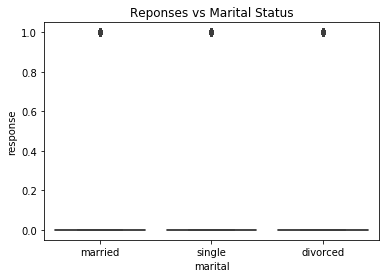

In [105]:
'''
Comparing Numeric-Categorical data types:
    
    One Numerical, One Categorical
        - Mean
        - Median
        - Box Plots
'''

'''
Using boxplots to compare Categorical and Numerical data type
'''

sns.boxplot(df.marital,df.response).set_title("Reponses vs Marital Status")

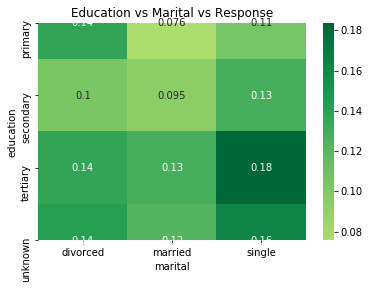

In [106]:
'''
Three variables in comparison

    Using correlation matrix (for numeric data type)

        - pandas.corr() method
        - seaborn .heatmap() method
'''
ax = plt.axes()
result = pd.pivot_table(data=df,index = 'education',columns = 'marital',values = 'response')
sns.heatmap(result,annot=True,cmap='RdYlGn',center=.0117,ax = ax)
ax.set_title("Education vs Marital vs Response")
plt.show()